/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


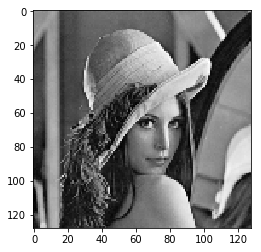

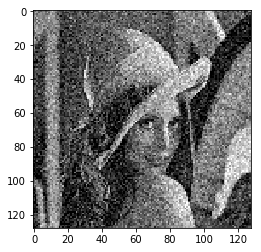

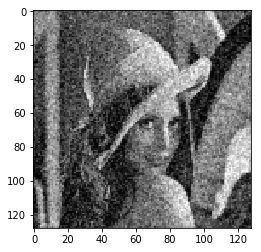

MSE = 486.07213173982393


In [60]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from skimage.transform import rescale, resize
import imageio

def read_image(name):
    image = imageio.imread(name)
    image = resize(image,(128,128))
    image = 255 * image
    image = image.astype(np.uint8)
    data = image.ravel()
    return image, data
    
def show_image(image):
    image = np.array([image])
    image = np.reshape(image, (128,128))
    image = resize(image,(128,128))
    plt.imshow(image,cmap=cm.gray)
    plt.show()
    
def add_noise(data):
    mean = 0
    variance = 30
    gauss = np.random.normal(mean, variance, len(data))
    data = data + gauss
    data[data > 255] = 255
    data[data < 0] = 0
    return data

def ICM(noisy_image):
    h = 1.0
    beta = 1.0
    eta = 7
    image1 = np.reshape(noisy_image, (128,128))
    noisy_image = np.reshape(noisy_image, (128,128))
    for row in range(image1.shape[0]):
        for col in range(image1.shape[1]):
            image1[row,col] = min_energy(noisy_image, image1, row, col, h, beta, eta)
    return image1
            
def min_energy(noisy_image,image,row,col,h,beta,eta):
    pixel = 2*eta*noisy_image[row,col]
    if row > 0:
        pixel += 2*beta*image[row-1,col]
    if col > 0:
        pixel += 2*beta*image[row,col-1]
    if col < image.shape[1]-1:
        pixel += 2*beta*image[row,col+1]
    if row < image.shape[0]-1:
        pixel += 2*beta*image[row+1,col]
    pixel = pixel/(2*h+2*beta*4+2*eta)
    if pixel > 255:
        pixel = 255
    return pixel

def MSE(denoised_image, image):
    image = np.array([image])
    image = image.reshape(128,128)
    mse = ((denoised_image - image)**2).mean(axis=None)
    return mse

if __name__=="__main__":
    name="/Users/johanabrahamsson/Documents/Machine learning and data science/Python/lena_gray.jpg"
    image, data = read_image(name)
    show_image(data)
    noisy_image=add_noise(data)
    show_image(noisy_image)
    denoised_image = ICM(noisy_image)
    mse = MSE(denoised_image,image)
    show_image(denoised_image)
    print("MSE =", mse)

In [68]:
from matplotlib import pyplot as plt
import numpy as np

def create_histogram(image):
    histo = np.histogram(image.flatten(), range=(0, 255), bins = 255)
    histo0 = np.concatenate(([0], histo[0]), axis=0)
    prob_x_ij = histo0/np.sum(histo0)
    pixel_values = histo[1].astype(int)
    return prob_x_ij, pixel_values

def create_p_y_x(data):
    p_y_x_mat = []
    for i in data:
        y_j_dist = np.random.normal(i, 30, len(data))
        his_y = np.histogram(y_j_dist, range=(0, 255), bins = 255)
        his_y = np.concatenate(([0], his_y[0]), axis=0)
        prob_y_ij = his_y/np.sum(his_y)
        p_y_x_mat.append(prob_y_ij)
    p_y_x_mat = np.array(p_y_x_mat)
    p_y_x_mat = p_y_x_mat.T
    return p_y_x_mat

def create_p_x_x(data, av_dist_pix):
    p_x_x_mat = []
    for i in data:
        x_j_dist = np.random.normal(i, av_dist_pix, len(data))
        his_x = np.histogram(x_j_dist, range=(0, 255), bins = 255)
        his_x = np.concatenate(([0], his_x[0]), axis=0)
        prob_x_ij = his_x/np.sum(his_x)
        p_x_x_mat.append(prob_x_ij)
    p_x_x_mat = np.array(p_y_x_mat)
    return p_x_x_mat

def compute_dist_bet_pix(data):
    dist_bet_pix_vec = []
    for k in np.arange(1,len(data)):
        dist_bet_pix = np.abs(int(data[k-1])-int(data[k]))
        dist_bet_pix_vec.append(dist_bet_pix)
    dist_bet_pix_vec = np.array(dist_bet_pix_vec)
    av_dist_pix = sum(dist_bet_pix_vec)/len(dist_bet_pix_vec)
    return av_dist_pix
    

def create_chi_matrix(prob_x_ij, p_y_x_mat):
    prob_x_ij = np.array(prob_x_ij)
    chi_matrix = p_y_x_mat
    chi_matrix[:,0] = prob_x_ij*chi_matrix[:,0]
    for t in np.arange(1,chi_matrix.shape[1]):
        chi_matrix[:,t]*max(chi_matrix[:,t-1])
    

if __name__=="__main__":
    prob_x_ij, pixel_values = create_histogram(image)
    prob_y_ij, pixel_values = create_histogram(noisy_image)
    p_y_x_mat = create_p_y_x(data)
    print(p_y_x_mat.shape)
    av_dist_pix = compute_dist_bet_pix(data)
    p_x_x_mat = create_p_x_x(data, av_dist_pix)
    print(p_x_x_mat.shape)
    #create_chi_matrix(prob_x_ij, p_y_x_mat)
    


(256, 16384)


In [11]:
count = 0
for i in np.arange(256):
    for j in np.arange(256):
        for k in data[1:len(data)]:
            if data[k] == i && data[k] == data[k-1]:
                count += 1
    

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [65]:
dist_bet_pix_vec = []
for k in np.arange(1,len(data)):
    dist_bet_pix = np.abs(int(data[k-1])-int(data[k]))
    dist_bet_pix_vec.append(dist_bet_pix)

dist_bet_pix_vec = np.array(dist_bet_pix_vec)
av_dist_pix = sum(dist_bet_pix_vec)/len(dist_bet_pix_vec)
av_dist_pix

16.16828419703351